In [1]:
!pip install -q tensorflow_hub # for colanb

The directory '/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python3.5/dist-packages/tensorflow_hub-0.3.0.dist-info'
Consider using the `--user` option or check the permissions.



In [1]:
import tensorflow as tf
print(tf.__version__) # I dont think we cn run this with 2.0.0-alpha0

2.0.0-alpha0


In [ ]:
import pathlib

data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)
data_root = pathlib.Path(data_root)
print(data_root)

for item in data_root.iterdir():
  print(item)


3670
['/tmp/.keras/datasets/flower_photos/daisy/520752848_4b87fb91a4.jpg', '/tmp/.keras/datasets/flower_photos/tulips/14022473102_3b24ca08cb_m.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/17243540220_65b98eb926_n.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/14396023703_11c5dd35a9.jpg', '/tmp/.keras/datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/8757650550_113d7af3bd.jpg', '/tmp/.keras/datasets/flower_photos/tulips/13472387874_d844478dbb.jpg', '/tmp/.keras/datasets/flower_photos/tulips/112650879_82adc2cc04_n.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/5613466853_e476bb080e.jpg', '/tmp/.keras/datasets/flower_photos/sunflowers/4933822052_2dfef02517.jpg']


In [13]:

import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print(image_count)
print(all_image_paths[:10])

3670
['/tmp/.keras/datasets/flower_photos/daisy/520752848_4b87fb91a4.jpg', '/tmp/.keras/datasets/flower_photos/tulips/14022473102_3b24ca08cb_m.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/17243540220_65b98eb926_n.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/14396023703_11c5dd35a9.jpg', '/tmp/.keras/datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/8757650550_113d7af3bd.jpg', '/tmp/.keras/datasets/flower_photos/tulips/13472387874_d844478dbb.jpg', '/tmp/.keras/datasets/flower_photos/tulips/112650879_82adc2cc04_n.jpg', '/tmp/.keras/datasets/flower_photos/dandelion/5613466853_e476bb080e.jpg', '/tmp/.keras/datasets/flower_photos/sunflowers/4933822052_2dfef02517.jpg']


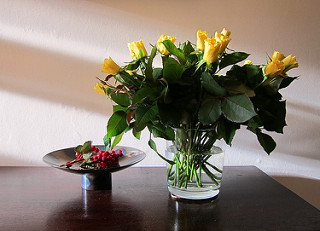

Image (CC BY 2.0)  by Graniers



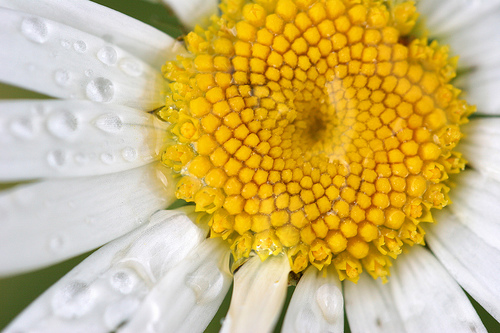

Image (CC BY 2.0)  by jenny downing



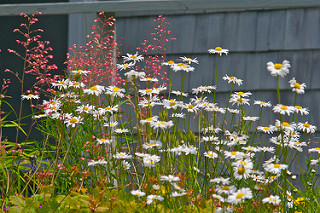

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(data_root)


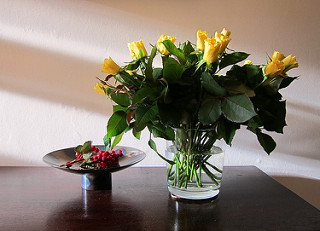

Image (CC BY 2.0)  by Graniers



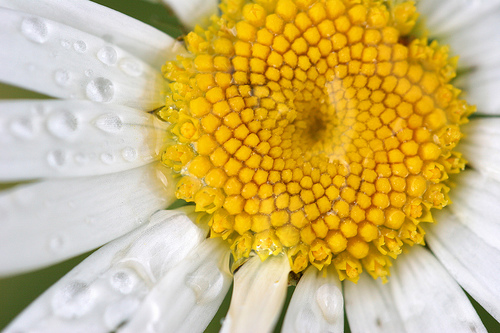

Image (CC BY 2.0)  by jenny downing



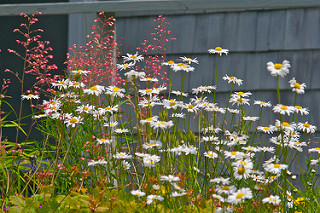

In [14]:

attributions = (data_root/"LICENSE.txt").read_text(encoding="utf8").splitlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])
    
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [4]:
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 256, 256, 3)
Labe batch shape:  (32, 5)


In [6]:
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Lambda

#tf.disable_eager_execution()

classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2" #@param {type:"string"}

def classifier(x):
  classifier_module = hub.Module(classifier_url)
  return classifier_module(x)
  
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))


classifier_layer = Lambda(classifier, input_shape = IMAGE_SIZE+[3])
classifier_model = Sequential([classifier_layer])
classifier_model.summary()

RuntimeError: variable_scope module_1/ was unused but the corresponding name_scope was already taken.